<a href="https://colab.research.google.com/github/uteThAn/BaitapAI_CNN/blob/main/foodvn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
from keras_preprocessing import image
import cv2
import os
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.preprocessing import image

In [43]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
train = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/food/train',
                                                 target_size = (128, 128),
                                                 batch_size = 12,
                                                 class_mode ='categorical')
vali_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
vali = vali_datagen.flow_from_directory('/content/drive/MyDrive/AI/food/validation',
                                            target_size = (128, 128),
                                            batch_size = 12,
                                            class_mode = 'categorical')

Found 1610 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode="max",restore_best_weights=True)
print("Image Processing.......Compleated")
model = tf.keras.models.Sequential()
print("Building Neural Network.....")
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Image Processing.......Compleated
Building Neural Network.....


In [45]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
print("Training cnn")
history=model.fit( train, validation_data = vali, batch_size = 64,
                            epochs=35,
                           callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience= 5,
            restore_best_weights=True
        )
    ])
model.save("/content/drive/MyDrive/AI/food.h5")

Training cnn
Epoch 1/35
135/135 [==============================] - 41s 303ms/step - loss: 2.2959 - accuracy: 0.1472 - val_loss: 2.2179 - val_accuracy: 0.2050
Epoch 2/35
135/135 [==============================] - 41s 304ms/step - loss: 2.0452 - accuracy: 0.2447 - val_loss: 2.0041 - val_accuracy: 0.3167
Epoch 3/35
135/135 [==============================] - 40s 296ms/step - loss: 1.8559 - accuracy: 0.3416 - val_loss: 1.9374 - val_accuracy: 0.3517
Epoch 4/35
135/135 [==============================] - 40s 297ms/step - loss: 1.7372 - accuracy: 0.3932 - val_loss: 1.8400 - val_accuracy: 0.3800
Epoch 5/35
135/135 [==============================] - 40s 298ms/step - loss: 1.6263 - accuracy: 0.4342 - val_loss: 1.7036 - val_accuracy: 0.4350
Epoch 6/35
135/135 [==============================] - 43s 317ms/step - loss: 1.5260 - accuracy: 0.4733 - val_loss: 1.7654 - val_accuracy: 0.4750
Epoch 7/35
135/135 [==============================] - 40s 298ms/step - loss: 1.4440 - accuracy: 0.5130 - val_loss: 1.

In [48]:
score=model.evaluate(vali,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

50/50 [==============================] - 11s 218ms/step - loss: 1.3380 - accuracy: 0.5933
test loss =  1.3379758596420288
test accuracy =  0.5933333039283752


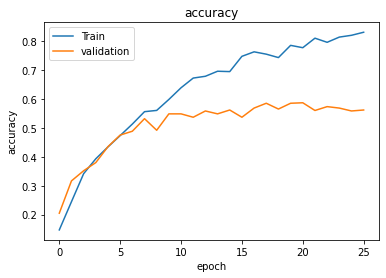

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
#model=model.load("/content/drive/MyDrive/AI/food.h5")

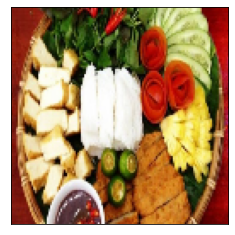

bún đậu mắm tôm


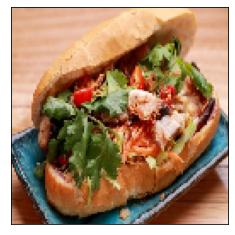

cá kho


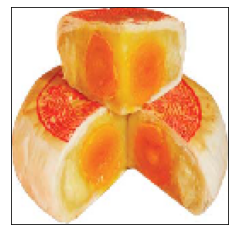

bánh pía


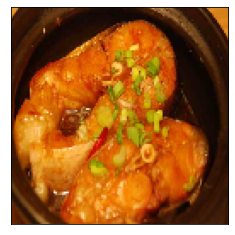

cá kho


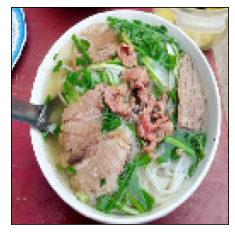

phở


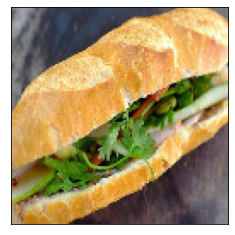

bánh mì


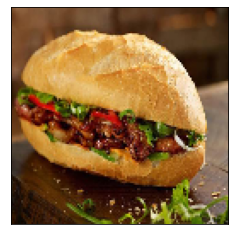

bánh mì


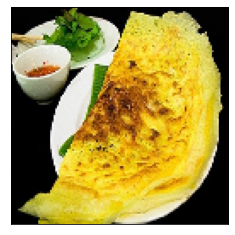

banh xèo


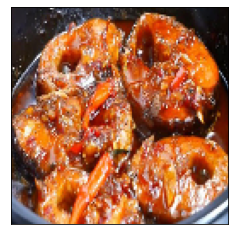

cá kho


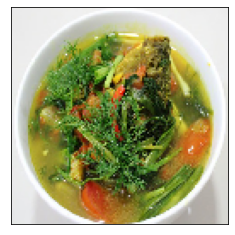

canh chua


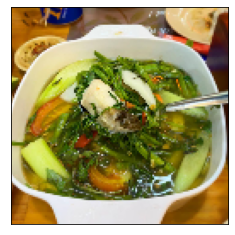

banh xèo


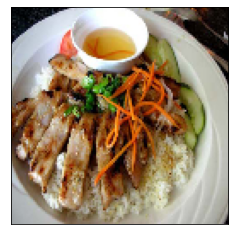

cơm tấm


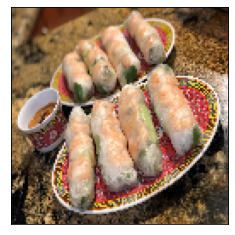

gỏi cuốn


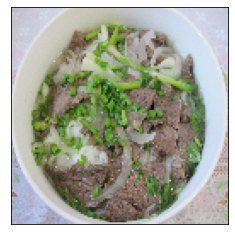

phở


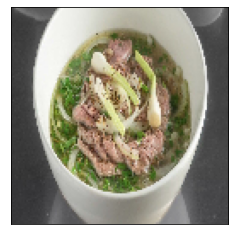

phở


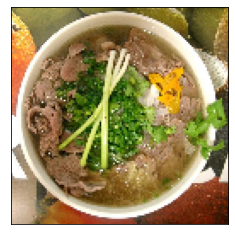

phở


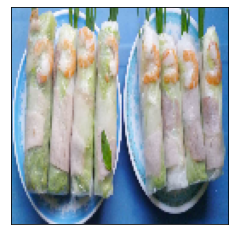

gỏi cuốn


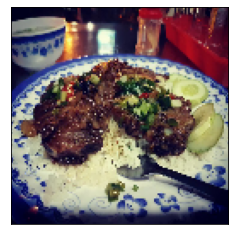

cơm tấm


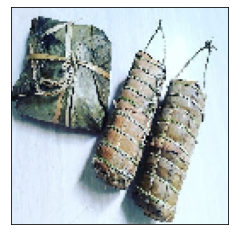

gỏi cuốn


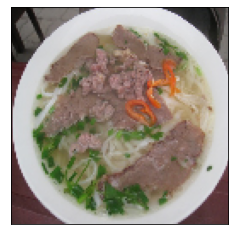

phở


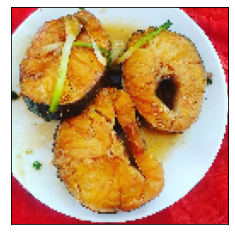

bánh mì


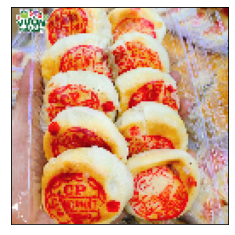

bánh pía


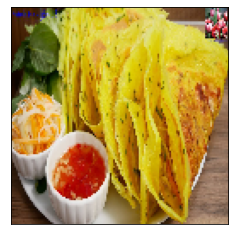

banh xèo


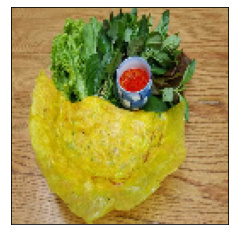

banh xèo


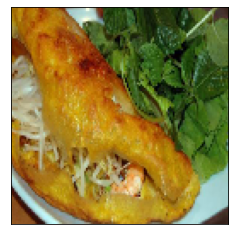

banh xèo


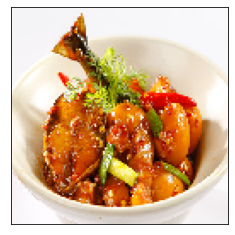

cá kho


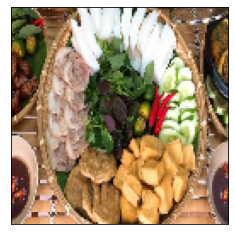

bún đậu mắm tôm


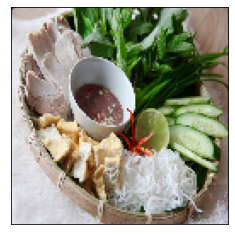

bún đậu mắm tôm


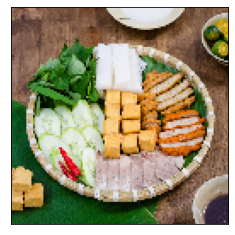

bún đậu mắm tôm


In [52]:


dir = '/content/drive/MyDrive/AI/food/test'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(128,128))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  x= img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val=np.argmax(model.predict(images))
  if val == 0:
    print("bánh mì")
  if val == 1:
    print("bánh pía")
  if val == 2:
    print("bánh tét")
  if val == 3:
    print("banh xèo")
  if val == 4:
    print("bún đậu mắm tôm")
  if val == 5:
    print("cá kho")
  if val == 6:
    print("canh chua")
  if val == 7:
    print("cơm tấm")
  if val == 8:
    print("gỏi cuốn")
  if val == 9:
    print("phở")


In [ ]:
train.class_indices

{'banhmi': 0,
 'banhpia': 1,
 'banhtet': 2,
 'banhxeo': 3,
 'bundaumamtom': 4,
 'cakho': 5,
 'canhchua': 6,
 'comtam': 7,
 'goicuon': 8,
 'pho': 9}